## Imports

In [1]:
import numpy as np
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt

FIGSIZE= (5, 3)

## Problem 2.6

x_star: 0.6449
Total error: 0.2056


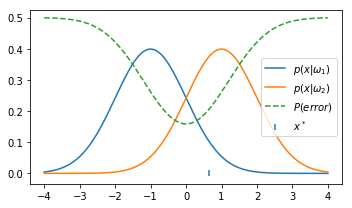

In [2]:
mu1, sigma1= -1, 1
mu2, sigma2= 1, 1

dist1 = stats.norm(loc=mu1, scale=sigma1)
dist2 = stats.norm(loc=mu2, scale=sigma2)
E_1 = 0.05

x_star = mu1 + sigma1 * stats.norm.ppf(1 - E_1)  # ppf = inverse of `cdf`
print(f'x_star: {round(x_star, 4)}')

total_error = 0.5 * (E_1 + stats.norm.cdf((mu1 - mu2)/sigma2 + (sigma1/sigma2) * stats.norm.ppf(1 - E_1)))
print(f'Total error: {round(total_error, 4)}')

x = np.linspace(-4, 4, num=2**8)
bayes_error = 0.5 * ((1 - dist1.cdf(x)) + dist2.cdf(x))

plt.figure(figsize=FIGSIZE)
plt.plot(x, dist1.pdf(x), label='$p(x | \omega_1)$')
plt.plot(x, dist2.pdf(x), label='$p(x | \omega_2)$')
plt.scatter([x_star], [0], label='$x^*$', marker='|')
plt.plot(x, bayes_error, '--', label='$P(error)$')
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch2_prob6.pdf')

## Problem 4.3

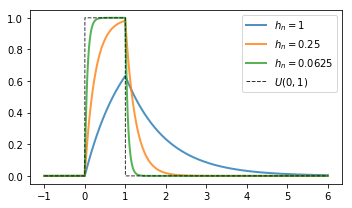

In [3]:
def p_bar(x, a, h_n):
    """
    Function to plot the average p_bar(x),
    given the three cases from the problem.
    """
    y = np.zeros_like(x)
    mask = (0 <= x) & (x <= a)
    y[mask] = ((1 - np.exp(-x / h_n)) /a)[mask]
    
    mask = x >= a
    y[mask] = ((np.exp(a / h_n) - a) * np.exp(-x / h_n) /a)[mask]
    return y

def U(x, a):
    """
    Plot uniform distribution on 0 <= x <= a.
    """
    y = np.zeros_like(x)
    mask = (0 <= x) & (x <= a)
    y[mask] = (np.ones_like(x)/a)[mask]
    return y
    
    
plt.figure(figsize=FIGSIZE) 

x = np.linspace(-1, 6, num=2**14)
for h_n in [1, 1/4, 1/16]:
    plt.plot(x, p_bar(x, a=1, h_n=h_n), label=f'$h_n = {h_n}$', lw=2, alpha=0.8)
    
plt.plot(x, U(x, a=1), 'k--', label=f'$U(0, 1)$', lw=1, alpha=0.8)
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch4_prob3_b.pdf')

/home/tommy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


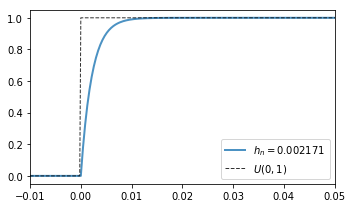

In [4]:
plt.figure(figsize=FIGSIZE) 

a = 1
h_n = a/(100 * np.log(100))

x = np.linspace(-1, 6, num=2**15)
plt.plot(x, p_bar(x, a=a, h_n=h_n), label=f'$h_n = {round(h_n, 6)}$', lw=2, alpha=0.8)
    
plt.plot(x, U(x, a=1), 'k--', label=f'$U(0, 1)$', lw=1, alpha=0.8)
plt.legend()
plt.xlim([-0.01, 0.05])
plt.tight_layout()
plt.savefig('duda_ch4_prob3_d.pdf')

## Problem 4.27

In [5]:
def tantimoto(a:set, b:set) -> float:
    """
    The tantimoto metric of two sets.
    """
    if not isinstance(a, set):
        a = set(a)
    if not isinstance(b, set):
        b = set(b)
    
    s = len(a) + len(b)
    len_inersection = len(a.intersection(b))
    
    return (s - 2 * len_inersection) / (s - len_inersection)


import itertools

tantimoto(set('abc'), set('sdf'))

words = ['pattern', 'pat', 'pots', 'stop', 'taxonomy', 'elementary']

for w1, w2 in sorted(itertools.combinations(words, 2), key=lambda t: tantimoto(*t)):
    print(w1, w2, tantimoto(w1, w2))
    #print('\\texttt{' + f'{w1}' + '}' + ' & \\texttt{' + f'{w2}' + '}' + f' &  {round(tantimoto(w1, w2), 3)} \\\ ')
    
for w1, w2, w3 in itertools.permutations(words, 3):
    
    if not (tantimoto(w1, w3) <= (tantimoto(w1, w2) + tantimoto(w2, w3))):
        print('Triangle inequality not obeyed for:')
        print(w1, w2, w3)

pots stop 0.0
pattern elementary 0.4444444444444444
pattern pat 0.5
taxonomy elementary 0.5
pat pots 0.6
pat stop 0.6
pattern taxonomy 0.7
pattern pots 0.75
pattern stop 0.75
pat taxonomy 0.75
pat elementary 0.7777777777777778
pots taxonomy 0.7777777777777778
stop taxonomy 0.7777777777777778
pots elementary 0.9090909090909091
stop elementary 0.9090909090909091


## Problem 4.13

CPU times: user 705 ms, sys: 3.08 ms, total: 708 ms
Wall time: 214 ms


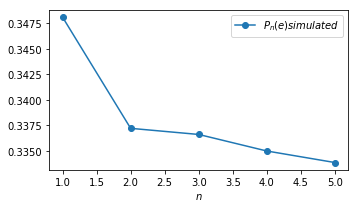

In [23]:
%%time

from scipy.stats import triang


def run_simulation(num_samples_from_each, simulations=10000, random_state=42):
    """
    Generate samples from each distribution. Check error rate.
    """
    np.random.seed(random_state)
    
    if num_samples_from_each == 0:
        return 0.5
    
    # Set up distributions
    x_dist = triang(loc=0, scale=1, c=1)  # This is p(x|w_1)
    y_dist = triang(loc=0, scale=1, c=0)  # This is p(x|w_2)
    
    n = num_samples_from_each
    x_value = x_dist.rvs(size=(simulations, 1))
    
    x_n_vals = x_dist.rvs(size=(simulations, n))
    y_n_vals = y_dist.rvs(size=(simulations, n))
    
    closest_x = np.min(np.abs(x_value - x_n_vals), axis=1).reshape(-1, 1)
    closest_y = np.min(np.abs(x_value - y_n_vals), axis=1).reshape(-1, 1)
    
    errors = np.argmin(np.hstack((closest_x, closest_y)), axis=1)
    
    return errors.sum() / simulations


plt.figure(figsize=FIGSIZE) 

# Simulation
n = [1, 2, 3, 4, 5]
P_e_sim = [run_simulation(k, simulations=100_000) for k in n]

# Analytical
P_e = lambda n: 1/3 + 1/((n+1) * (n+3)) + 1/(2 * (n+2) * (n+3))
P_e_true = [P_e(k) for k in n]

plt.plot(n, P_e_sim, '-o', label='$P_n(e) simulated$')
#plt.plot(n, P_e_true, '-o', label='$P_n(e) true$')

plt.xlabel('Error rate')
plt.xlabel('$n$')
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch4_prob13_sim.pdf')

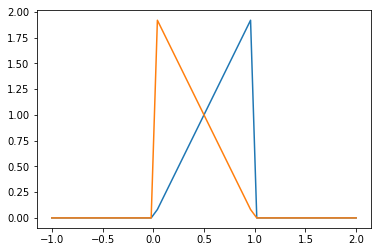

In [9]:
x_dist = triang(loc=0, scale=1, c=1)  # This is p(x|w_1)
y_dist = triang(loc=0, scale=1, c=0)  # This is p(x|w_2)

x = np.linspace(-1, 2)

plt.plot(x, x_dist.pdf(x))

plt.plot(x, y_dist.pdf(x))

In [ ]:

import numpy as np
x = np.linspace(-0.2, 1.2, num= 2**10)

plt.plot(x, dist.pdf(x))
plt.plot(x, dist2.pdf(x))

data = dist.rvs(size=(100000, 2), random_state=None)

dists = np.abs(dist.rvs(size=(1000000), random_state=None) - dist2.rvs(size=(1000000), random_state=None))

# minimum of two points
n = 10**7
x = dist.rvs(size=(n), random_state=1)
dists2 = np.abs(x - dist.rvs(size=(n), random_state=2))
dists3 = np.abs(x - dist.rvs(size=(n), random_state=3))
dists5 = np.abs(x - dist.rvs(size=(n), random_state=4))
dists4 = np.minimum(np.minimum(dists3, dists2), dists5)
#data = np.random.rand(1000000, 2)

#dists = np.abs(data[:, 0] - data[:, 1]).ravel()

from KDEpy import FFTKDE


x, y = FFTKDE(bw=0.001).fit(dists4)()

plt.plot(x, y, label='kde')
plt.legend()
g = (4/3)*(x*x*x - 3*x + 2)
#plt.plot(x, g)
G = (4/3) * (x**4/4 - (3/2)*x*x + 2*x)
plt.plot(x, 1* (1 - G)**0*g)


#plt.plot(x, np.cumsum(y)/ np.sum(y))

#x, y = FFTKDE(bw=0.002).fit(dists2)()
#plt.plot(x, np.cumsum(y)/ np.sum(y))

In [148]:
dist = triang(loc=0, scale=1, c = 1)
dist2 = triang(loc=0, scale=1, c = 0)

n = 1000000
x = dist.rvs(n)
x_1 = dist.rvs(n)
y_1 = dist2.rvs(n)

dists = np.vstack((np.abs(x - x_1), np.abs(x - y_1)))

dists.shape

np.sum(dists.argmin(axis=0)) / n

0.350829

In [150]:
P = lambda n: 1/ 3 + 1/((n+1) * (n+3)) + 1/(2*(n+2) * (n+3))

P(1)

0.5